# NAND Performances Analysis: garbage collection parameters (time)

This simulation tries to understand the different performances of a NAND disk varying the garbage collector parameters. In this simulation the garbage collector activation time is changes while the percentage of dirty pages in a block is keept constant (40%, as seen in a previous test).

This simulation collects 100 K samples based on host write requests. The simulation runs a random writes of pages, 4 KiB each. So, the total amount of data to be written is 390.625 [MiB].

There are various NAND cells simulated. All NANDs have the following common features:

* page size:               4096 [Bytes] (4 [KiB]);
* pages per block:         128 [#];
* total blocks;            256 [#];
* total pages;             32768 [#];
* capacity:                128 [MiB];
* page write time:         40 [µs];
* page read time:          20 [µs];
* block erase time:        1500 [µs];
* max bandwidth read:      195.31 [MiB\s] (theoretical);
* max bandwidth write:     97.66 [MiB\s] (theoretical).

Then, every NAND has a different garbage collector parameter:

* **t1** activation every 1 µs (always);
* **t500** activation every 500 µs;
* **t5000** activation every 5 ms;
* **t50000** activation every 50 ms;
* **t500000** activation every 0.5 s;
* **t1000000** activation every 1 s.

In [1]:
# initialize
%matplotlib inline
import matplotlib.pyplot as plt
from simulator import analysis_helper as ah

# read the simulation data
sim_names = ("t1", "t500", "t5000", "t50000", "t500000", "t1000000")
data = ah.load_data(sim_names, "../RESULTS/simple_gc_test_1/")

## Page written host vs disk
This plot is in logaritmic scale and compares the host write requests (_x axis_) versus the effective disk writes (_y axis_). Ideally it should be linear: every host request correspond to a single disk write. Yet, due to the garbage collection or disk errors (_ie: disk is full_) the behaviour may change. 

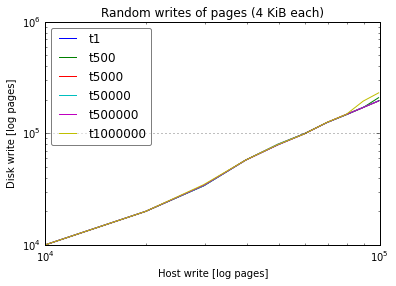

In [2]:
ah.inline_plot(sim_names, data, yid=6, xlog=True, ylog=True, show=False,
                xlabel="Host write [log pages]",
                ylabel="Disk write [log pages]")
# need extra parameters to better plotting
plt.axis([10 ** 4, 10 ** 5, 10 ** 4, 10 ** 6])  # [xmin, xmax, ymin, ymax]
plt.show()

## Host write time

This plot shows how much time is elapsed respect to the host write requests.

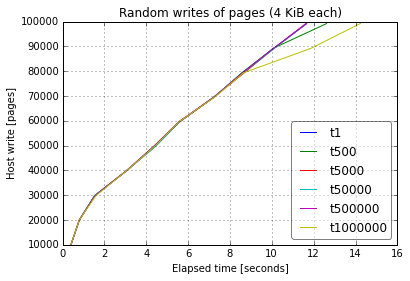

In [3]:
ah.plot_disk_write_time(sim_names, data)

## IOPS over written pages

This plot shows the IOPS as seen by the host over the write requests.

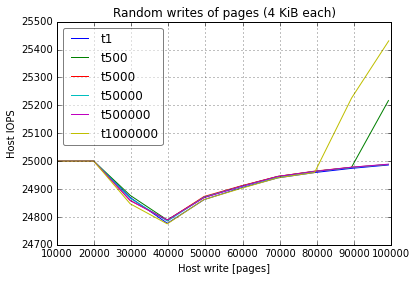

In [4]:
ah.plot_iops(sim_names, data)

## Amplification factor over written pages

This plot shows the amplification factor as seen by the host over the write requests. The amplification factor is defined as:
$$ A_f = \frac{W_s}{W_h} $$

Where:

* $W_s$ is the number of pages written actually by the disk;
* $W_h$ is the number of pages the host requests to write.


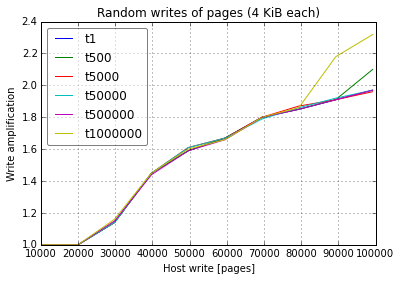

In [5]:
ah.plot_disk_af(sim_names, data)

## Write bandwidth over written pages

This plot shows the write bandwidth as seen by the host over the write requests.

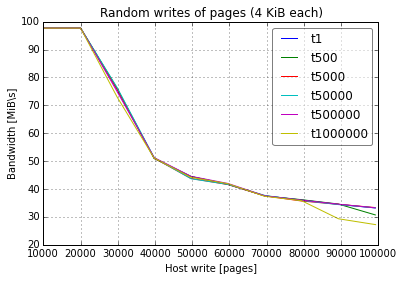

In [6]:
ah.plot_bandwidth(sim_names, data)

## Dirty pages over written pages

This plot shows the number of dirty pages over the write requests.

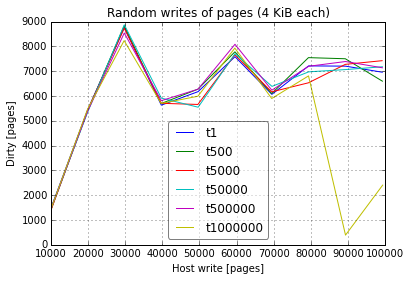

In [7]:
ah.plot_dirty_pages(sim_names, data)

## Write failures over written pages

This plot shows the number of failures (page not written due to disk errors) over the write requests.

All disks are able to fulfil the host requests.

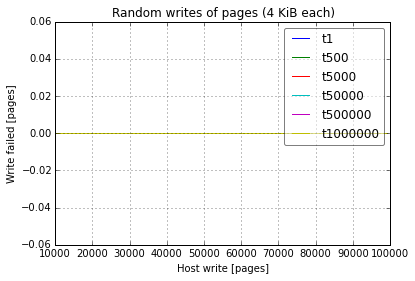

In [8]:
ah.plot_write_faiures(sim_names, data)

## Final Statistics

In [9]:
ah.generate_final_stats(sim_names, data)



t1             Min            Max            Mean           
time           0.40004        11.66388       5.33 ± 3.98
iops           24777          25000          24,927.10 ± 73.15
bandwidth      33.22          97.66          54.94 ± 25.67
amplification  1.0            1.97           1.54 ± 0.37
host write     10001          99192          54,624.00 ± 29,996.65
host read      0              0              0.00 ± 0.00
disk write     10001          195312         93,832.60 ± 64,675.30
disk read      0              96120          39,208.60 ± 34,893.44
block erased   0              1286           531.40 ± 466.16
failures       0              0              0.00 ± 0.00
dirty pages    1430           8761           6,246.90 ± 1,964.60


t500           Min            Max            Mean           
time           0.4            12.6197        5.42 ± 4.15
iops           24789          25217          24,954.80 ± 113.64
bandwidth      30.71          97.66          54.76 ± 25.93
amplification  1.

## Conclusions

The time parameters is not as important as the block %. Of course, extreme cases, specially if the time is too big, aren't good. At the very end we have **t50000** and **t500000** as winnner.